# 1. Global methane levels from 2002

In [1]:
import netCDF4
import xarray as xr

In [2]:
ds = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")

In [3]:
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

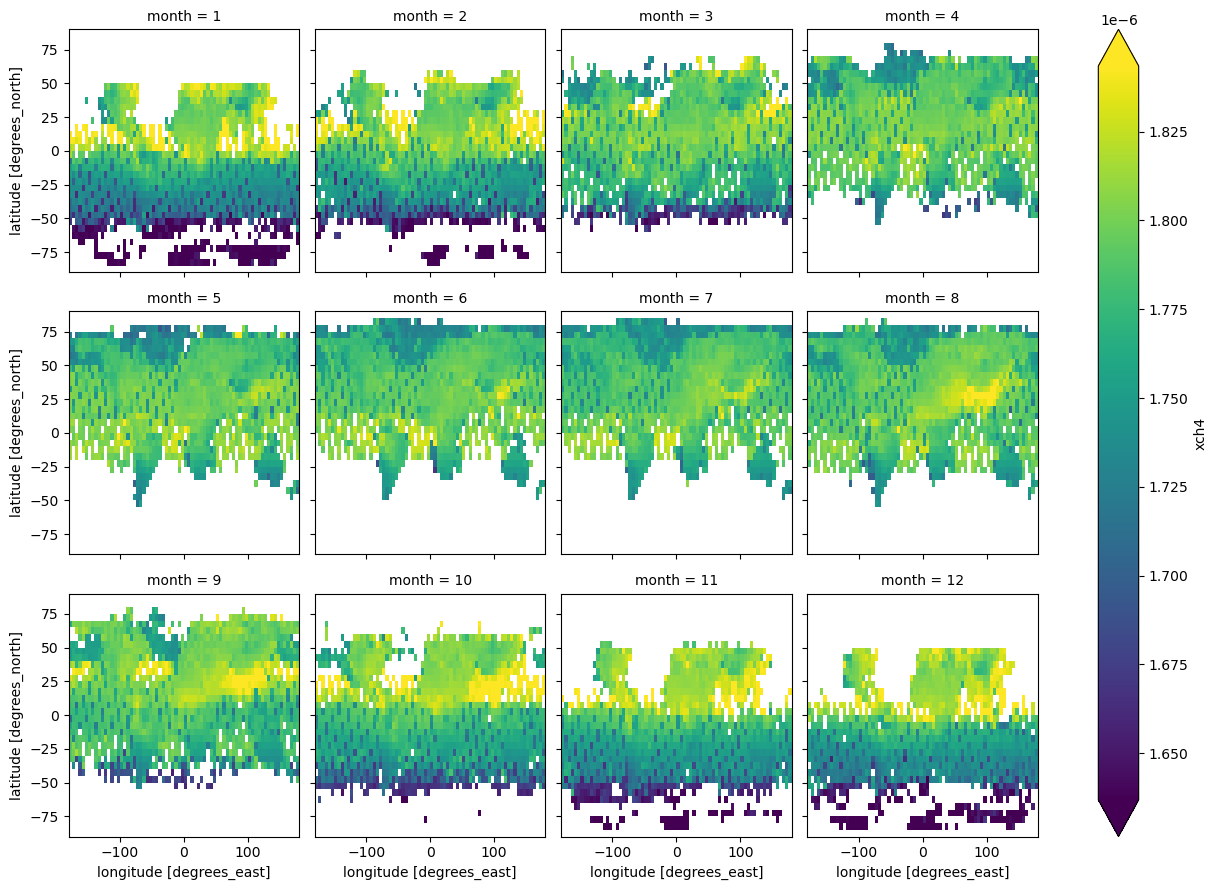

In [4]:
# 1.1
# 参考了申涵同学的代码
ds.xch4.groupby('time.month').mean().plot(col="month",
          col_wrap=4,
          robust=True) 

In [5]:
import numpy as np

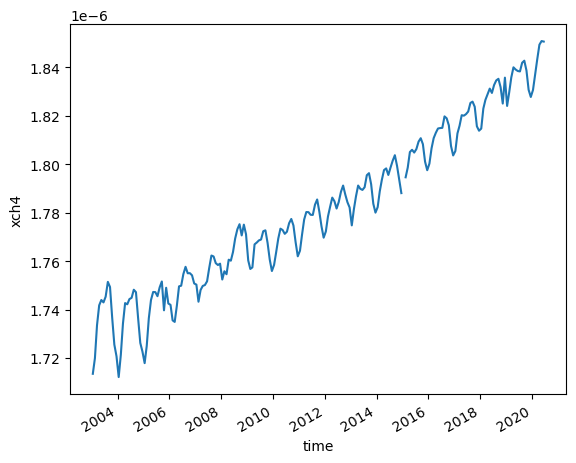

In [6]:
# 1.2
weights = np.cos(np.deg2rad(ds.lat))
ds.xch4.weighted(weights).mean(dim=('lon', 'lat')).sel(time=slice("2003-01","2020-06")).plot()

D:\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


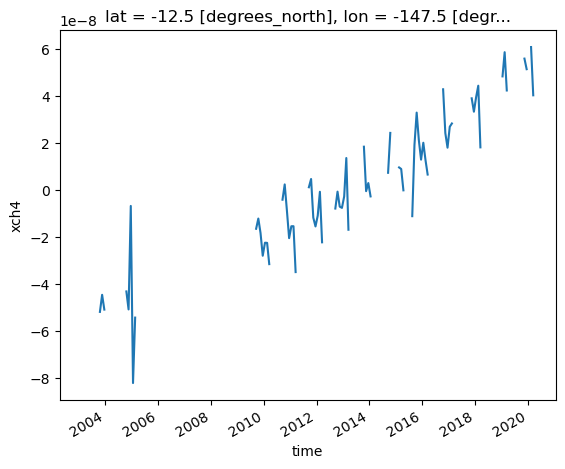

In [7]:
#1.3
sst=ds.xch4.sel(time=slice("2003-01", "2020-06")).groupby('time.month')
anom=sst-sst.mean(dim='time')
anom.sel(lat=-15.0,lon=-150.0,method='nearest').plot()

In [8]:
anom

<xarray.DataArray 'xch4' (time: 210, lat: 36, lon: 72)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2003-01-16T12:00:00 2003-02-15 ... 2020-06-16
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 8 9 10 11 12 1 2 3 4 5 6

# 2. Niño 3.4 index

In [9]:
# 2.1
# 参考了申涵同学的代码
nino = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
weights = np.cos(np.deg2rad(nino.lat))
nino_sst=nino.sst.sel(lat=slice(-5.0,5.0),lon=slice(190,240)).weighted(weights).mean(dim=('lon', 'lat'))
nino3_4=nino_sst.rolling(time=3).mean().isel(time=slice(2,684))
climatology=nino3_4.groupby('time.month').mean()
anomaly=nino_sst.groupby('time.month')-climatology

In [10]:
import matplotlib.pyplot as plt

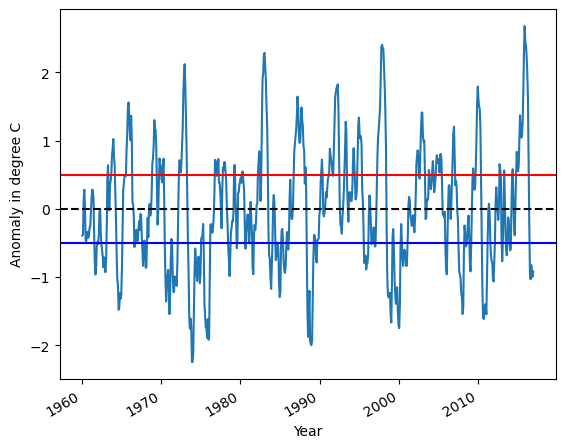

In [11]:
# 2.2
# 参考了申涵同学的代码
anomaly.plot()
plt.axhline(y=0,color="black",ls="--",lw=1.5)
plt.axhline(y=0.5,color="red",lw=1.5)
plt.axhline(y=-0.5,color="blue",lw=1.5)
plt.xlabel('Year')
plt.ylabel('Anomaly in degree C')
plt.show()

# 3. Explore a netCDF dataset

In [12]:
BC=xr.open_dataset("BC-em-anthro_input4MIPs_emissions_CMIP_CEDS-2017-05-18_gn_200001-201412.nc",engine="netcdf4")
BC_emiss=BC.BC_em_anthro.sel(sector=2)
BC_emiss

<xarray.DataArray 'BC_em_anthro' (time: 180, lat: 360, lon: 720)>
[46656000 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
    sector   int32 2
  * time     (time) object 2000-01-16 00:00:00 ... 2014-12-16 00:00:00
Attributes:
    units:         kg m-2 s-1
    long_name:     BC Anthropogenic Emissions
    cell_methods:  time: mean

D:\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


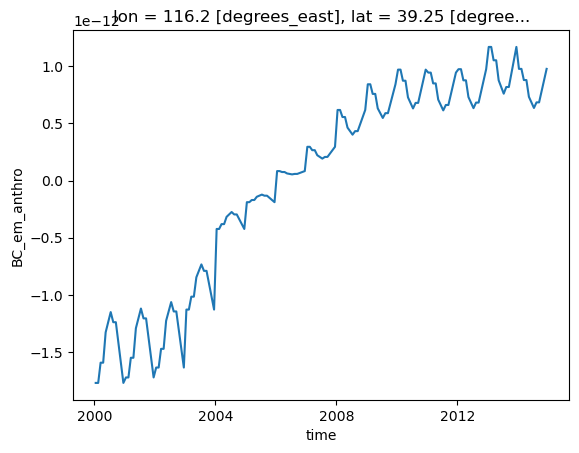

In [13]:
# 3.1 
# 北京附近的deseasonalized data
group_data=BC_emiss.groupby('time.month')
BC_deseason=group_data-group_data.mean(dim=('time'))
BC_deseason.sel(lon=116,lat=39,method='nearest').plot()

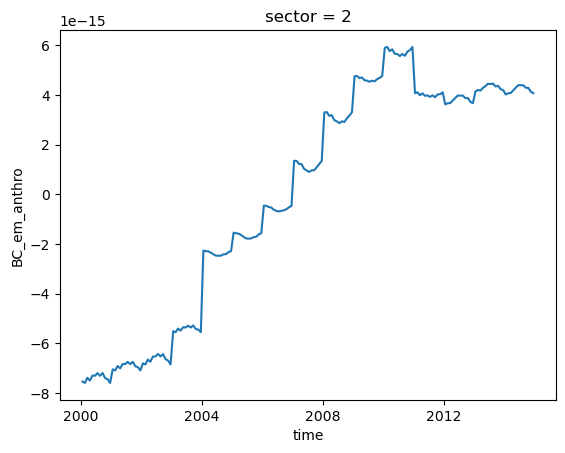

In [14]:
# 全球平均的deseasonalized data
BC_deseason.mean(dim=('lat','lon')).plot()

D:\anaconda3\lib\site-packages\xarray\core\computation.py:733: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Text(0.5, 1.0, 'global average BC emission')

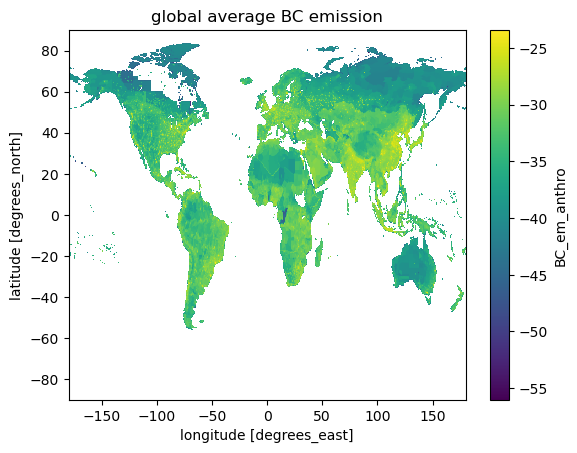

In [22]:
# 3.2
# 整个时间段的黑炭的全球排放，因为数值太小，所以取了对数值
np.log(BC_emiss.mean(dim='time')).plot()
plt.title('global average BC emission')

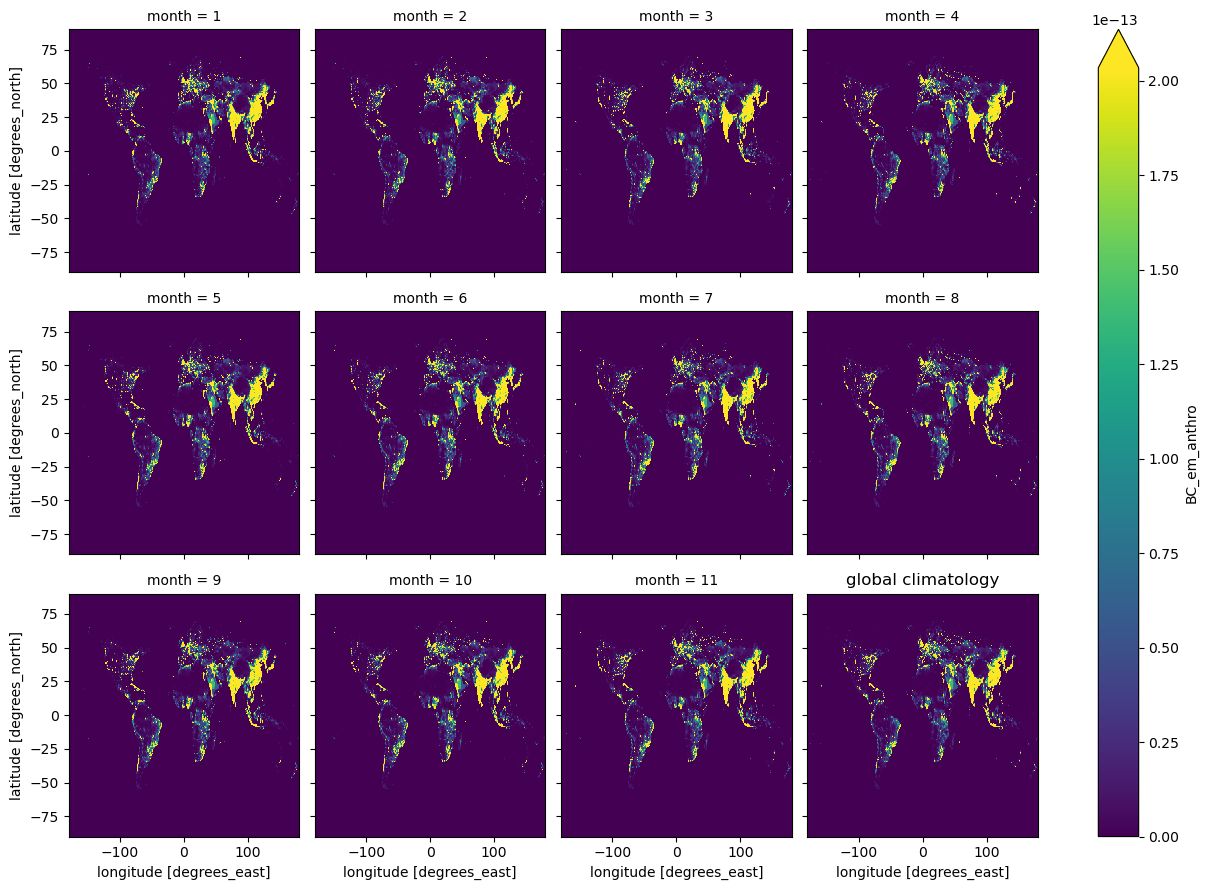

In [21]:
# 3.2
# 全球每个月的climatology
BC_emiss.groupby('time.month').mean().plot(col="month",
          col_wrap=4,
          robust=True) 
plt.title('global climatology')
plt.show()

Text(0.5, 1.0, 'global BC emission (weighted)')

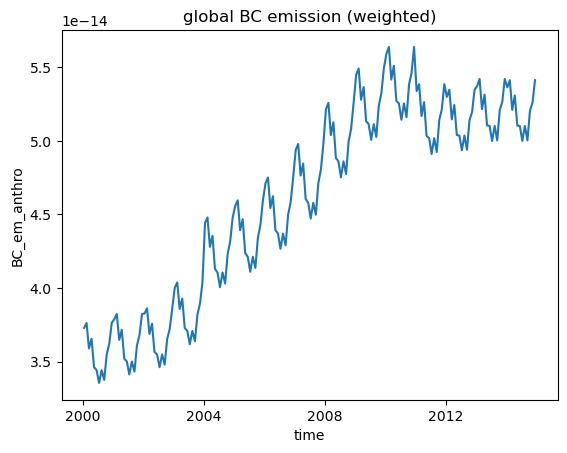

In [19]:
# 3.2
# 全球的黑炭平均排放时间序列
weights = np.cos(np.deg2rad(BC_emiss.lat))
BC_weighted = BC_emiss.weighted(weights)
BC_weighted.mean(dim=('lon','lat')).plot()
plt.title('global BC emission (weighted)')

D:\anaconda3\lib\site-packages\xarray\core\computation.py:733: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


Text(0.5, 1.0, 'zonal mean climatology')

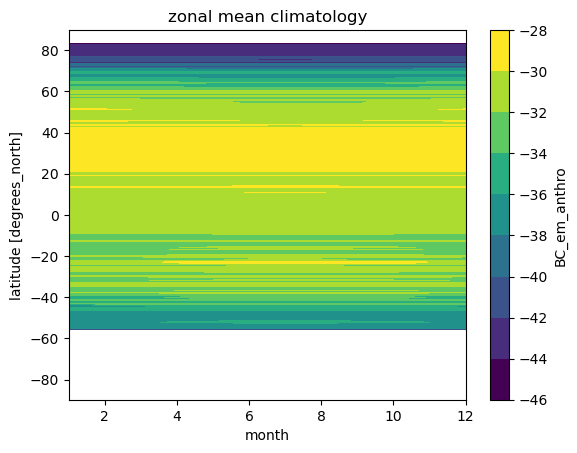

In [32]:
# 3.2
# zonal mean climatology
BC_clim=group_data.mean()
np.log(BC_clim.mean(dim='lon')).plot.contourf(x='month', 
                                       levels=12)
plt.title('zonal mean climatology')

In [36]:
# 3.2
import hvplot.xarray
BC_emiss.hvplot(groupby="time", clim=(BC_emiss.min(), BC_emiss.max()), cmap='turbo')

:DynamicMap   [time]
   :Image   [lon,lat]   (BC_em_anthro)